In [1]:
import uns
from uns import training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training.columns

Index(['centcol', 'centrow', 'contH', 'contW', 'contour', 'contxmax',
       'contxmin', 'contymax', 'contymin', 'hasmask', 'img', 'maskarea',
       'moments', 'pixels', 'skelavgdist', 'skeldist10', 'skeldist25',
       'skeldist50', 'skeldist75', 'skeldist90', 'skelmaxdist', 'skelpixels',
       'subject', 'svd', 'svdx0', 'svdx1', 'svdy0', 'svdy1', 'unitcontour',
       'KMeansCluster', 'MeanShift', 'DBSCAN', 'AgglomerativeClustering',
       'sv0', 'sv1', 'sv2', 'sv3'],
      dtype='object')

## Images

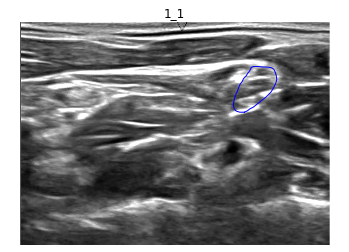

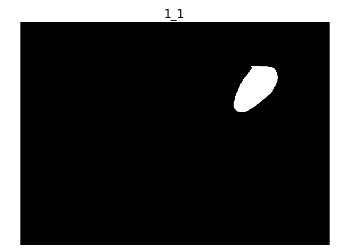

In [13]:
img = uns.image_pair(training.iloc[0])
ax = img.image.plot()
img.mask.plot()
img.mask.plot_contour(ax=ax)

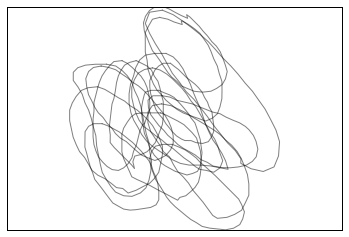

In [4]:
indices = [84, 798, 800, 1270, 1513, 1914, 2221, 2236, 2735, 3062, 3428, 3898, 4157, 4175, 4277, 4296, 5019]
batch = uns.batch(training.iloc[indices])
ax = None
for img in batch:
    ax = img.mask.plot_contour(ax=ax, color='k', alpha=0.5)

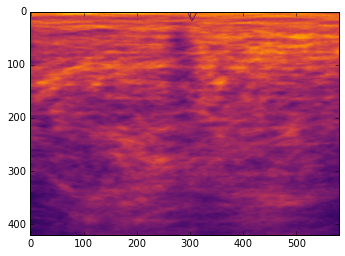

In [5]:
batchsum = np.sum(batch.array, axis=0)
plt.imshow(batchsum, cmap=plt.cm.inferno)

## iterate over all images/masks

In [2]:
batch = uns.batch(training)


In [3]:
dflist = [batch.pop(0).mask.pandas for i in range(len(batch)) ]
newtraining = pd.DataFrame(data=dflist)

/Users/chrisv/anaconda/lib/python3.4/site-packages/skimage/external/tifffile/tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


In [4]:
newtraining.head(5)

,centcol,centrow,contH,contW,contour,contxmax,contxmin,contymax,contymin,hasmask,...,skeldist90,skelmaxdist,skelpixels,subject,svd,svdx0,svdx1,svdy0,svdy1,unitcontour
0,0.759054,0.215119,0.141046,0.148295,"[[170.001960784, 170.008604422, 167.887180009,...",0.293118,0.144824,0.830697,0.689651,True,...,0.037019,0.048766,0.023012,1,"[[-0.28825547416, 0.144862624032], [0.23319781...",-0.288255,0.144863,0.233198,0.179064,"[[0.0779877528613, 0.0779992074088, 0.07434157..."
1,0.461796,0.253135,0.132774,0.187685,"[[200.001960784, 199.99991118, 199.061259228, ...",0.344831,0.157146,0.527586,0.394812,True,...,0.044761,0.055602,0.017894,1,"[[-0.406343752925, 0.0850610319553], [0.132856...",-0.406344,0.085061,0.132856,0.260161,"[[0.0916957732557, 0.0916922394548, 0.09007387..."
2,0.591766,0.212435,0.179318,0.193123,"[[179.001960784, 178.0064444, 174.927607716, 1...",0.308624,0.115501,0.681039,0.501721,True,...,0.050208,0.065267,0.019114,1,"[[-0.368934595494, 0.193910117371], [0.2863599...",-0.368935,0.193910,0.286360,0.249826,"[[0.0961891960519, 0.0944727884921, 0.08916444..."
3,0.509130,0.190581,0.105176,0.131088,"[[151.001960784, 151.002100933, 149.807912934,...",0.260348,0.129260,0.560348,0.455172,True,...,0.039354,0.053448,0.014750,1,"[[-0.297458154086, -0.0188305009098], [-0.0233...",-0.297458,-0.018831,-0.023345,0.239933,"[[0.0697671016095, 0.0697673432445, 0.06770839..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#training['hasmask'] = training['Cc'].notnull()
newtraining.loc[3667,'hasmask'] = False
newtraining.loc[3667]

centcol                                                  0.259405
centrow                                                 0.0794874
contH                                                    0.606912
contW                                                   0.0827358
contour         [[74.0019607843, 62.98951576, 45.979369745, 39...
contxmax                                                  0.12759
contxmin                                                0.0448538
contymax                                                  0.61376
contymin                                               0.00684852
hasmask                                                     False
img                                                            71
maskarea                                                 0.187653
moment_hu_I0                                          7.32368e+10
moment_hu_I1                                          4.81845e+21
moment_hu_I2                                          2.83774e+26
moment_hu_

In [18]:
newtraining.to_msgpack('training.bin')

In [22]:
training = newtraining

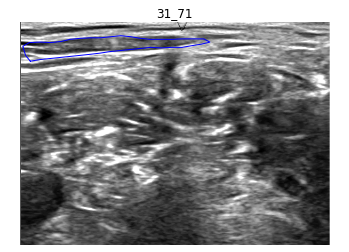

In [23]:
im_idx = 3667
im = uns.image_pair(newtraining.iloc[im_idx])
im.plot()

## Produce PCA descriptions of contours

In [24]:
contours = np.dstack(training.loc[training.hasmask, 'unitcontour'].values)
contours.shape

(2, 40, 2322)

In [25]:
contours = contours.reshape((-1,contours.shape[-1]), order='F')
A = contours[:,0]
contours.shape

(80, 2322)

((80, 80), (80,), (80, 2322))

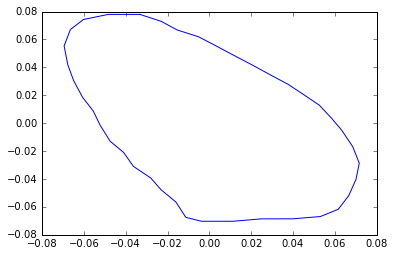

In [26]:
plt.plot(A[1::2],A[::2])

u,s,v = np.linalg.svd(contours, full_matrices=False)
u.shape, s.shape, v.shape

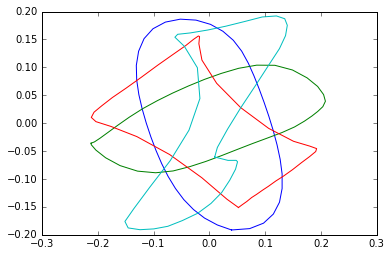

In [27]:
N = 4
plt.plot(u[1::2,:N],u[::2,:N])
sv = np.diag(s)[:N,:].dot(v)
Recon = u[:,:N].dot(np.diag(s)[:N,:].dot(v))

D={}
vals = np.arange(N)
keys = ['sv{:1d}'.format(v) for v in vals]

SV = pd.DataFrame(sv.T,columns=keys,index=training[training['hasmask']].index)

training = pd.concat((training,SV), axis=1)


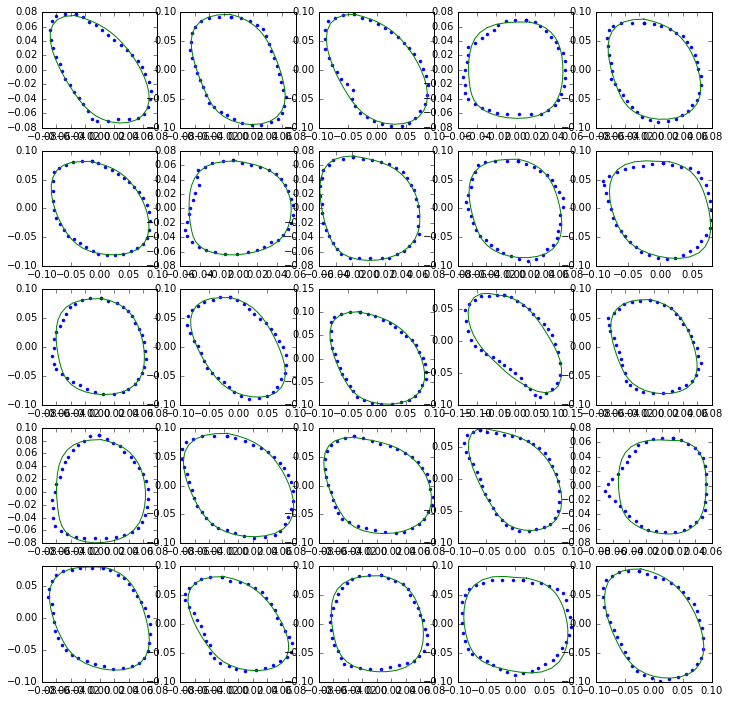

In [28]:
nplt = 5
fig, ax = plt.subplots(nplt,nplt, figsize=(12,12))
ax = ax.flatten()
for i in range(nplt**2):
    ax[i].plot(contours[1::2,i],contours[::2,i],'.')
    ax[i].plot(Recon[1::2,i],Recon[::2,i])


In [14]:
C = img.mask.contour
UC = D['unitcontour'].T
fig, ax = plt.subplots(1,4,figsize=(12,4))
ax[0].plot(C[1,:],C[0,:])
ax[0].plot(D['centcol']*580, D['centrow']*580,'o')
ax[1].plot(UC[1,:],UC[0,:])
ax[1].plot(D['centcol'], D['centrow'],'o')
nUC = (D['contour'].T/580 - [D['centrow'], D['centcol']]).T
ax[2].plot(nUC[1,:],nUC[0,:])
trUC = training.loc[i,'unitcontour']
ax[3].plot(trUC[1,:], trUC[0,:])

KeyError: 'unitcontour'

In [15]:
for row in training[training.hasmask].iterrows():
    C = row[1]['contour']
    Cr = row[1]['centrow']
    Cc = row[1]['centcol']
    nUC = (C.T/580 - [Cr, Cc]).T
    row[1].loc['unitcontour'] = nUC
    training.loc[row[0]] = row[1]


Exception: Data must be 1-dimensional

In [16]:
training.loc[0,'unitcontour'].shape

(2, 40)

In [29]:
training.to_msgpack('training.bin')